In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('/home/bench/Downloads/2009.csv')

In [4]:
df.head(5)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,...,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,...,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,...,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,...,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,...,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
print(df.info())  # Column types, non-null counts, and memory usage()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6429338 entries, 0 to 6429337
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [47]:
# Summary statistics
df.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
count,6.429338e+06,6.429338e+06,6.346471e+06,6.346471e+06,6.343551e+06,6.343551e+06,6.340016e+06,6.340017e+06,6.429338e+06,6.340016e+06,...,6.429338e+06,6.326976e+06,6.326977e+06,6.429338e+06,1.170501e+06,1.170501e+06,1.170501e+06,1.170501e+06,1.170501e+06,0.0
mean,2.293712e+03,1.319447e+03,1.326026e+03,7.598179e+00,1.603613e+01,1.350798e+03,1.478506e+03,6.894225e+00,1.496722e+03,1.485662e+03,...,1.293446e+02,1.262434e+02,1.033257e+02,7.249700e+02,1.546616e+01,2.755585e+00,1.644337e+01,6.408282e-02,1.953755e+01,NaN
std,2.046497e+03,4.577529e+02,4.688940e+02,3.176494e+01,1.056383e+01,4.700515e+02,4.878461e+02,4.908826e+00,4.733178e+02,4.904066e+02,...,6.966364e+01,6.950774e+01,6.706977e+01,5.610229e+02,3.998500e+01,1.790554e+01,2.979917e+01,1.745892e+00,3.705886e+01,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,-9.600000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.400000e+01,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,6.180000e+02,9.260000e+02,9.280000e+02,-5.000000e+00,1.000000e+01,9.440000e+02,1.107000e+03,4.000000e+00,1.119000e+03,1.112000e+03,...,8.000000e+01,7.600000e+01,5.500000e+01,3.250000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,1.629000e+03,1.315000e+03,1.322000e+03,-2.000000e+00,1.300000e+01,1.336000e+03,1.510000e+03,6.000000e+00,1.519000e+03,1.515000e+03,...,1.110000e+02,1.090000e+02,8.500000e+01,5.810000e+02,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,3.536000e+03,1.710000e+03,1.719000e+03,5.000000e+00,1.900000e+01,1.734000e+03,1.857000e+03,8.000000e+00,1.903000e+03,1.903000e+03,...,1.590000e+02,1.550000e+02,1.310000e+02,9.480000e+02,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.500000e+01,NaN
max,7.829000e+03,2.359000e+03,2.400000e+03,2.445000e+03,4.580000e+02,2.400000e+03,2.400000e+03,1.970000e+02,2.400000e+03,2.400000e+03,...,6.600000e+02,7.990000e+02,6.990000e+02,4.962000e+03,2.439000e+03,1.114000e+03,1.305000e+03,3.450000e+02,1.391000e+03,NaN


In [51]:
# Check missing values
df.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 82867
DEP_DELAY                82867
TAXI_OUT                 85787
WHEELS_OFF               85787
WHEELS_ON                89322
TAXI_IN                  89321
CRS_ARR_TIME                 0
ARR_TIME                 89322
ARR_DELAY               102361
CANCELLED                    0
CANCELLATION_CODE      6342300
DIVERTED                     0
CRS_ELAPSED_TIME             0
ACTUAL_ELAPSED_TIME     102362
AIR_TIME                102361
DISTANCE                     0
CARRIER_DELAY          5258837
WEATHER_DELAY          5258837
NAS_DELAY              5258837
SECURITY_DELAY         5258837
LATE_AIRCRAFT_DELAY    5258837
Unnamed: 27            6429338
dtype: int64

In [52]:

# Drop columns with too many missing values (threshold can be adjusted)
threshold = len(df) * 0.2  # 20% threshold for missing data
df_cleaned = df.dropna(thresh=threshold, axis=1)

# Impute missing values for specific columns if necessary (e.g., for float columns)
df_cleaned['DEP_DELAY'].fillna(df_cleaned['DEP_DELAY'].mean(), inplace=True)


/tmp/ipykernel_422106/3451245609.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['DEP_DELAY'].fillna(df_cleaned['DEP_DELAY'].mean(), inplace=True)
/tmp/ipykernel_422106/3451245609.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DEP_DELAY'].fillna(df_cleaned['DEP_DELAY'].mean(), inplace=True)


In [42]:
df.head(5)

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,...,year,month,day,weekday,DAY_OF_WEEK,MONTH,CRS_DEP_MINUTE,YEAR,DAY,IS_WEEKEND
0,XE,1204.0,DCA,EWR,1058.0,-2.0,18.0,1116.0,1158.0,8.0,...,2009,1,1,3,3,1,0,2009,1,0
1,XE,1206.0,EWR,IAD,1509.0,-1.0,28.0,1537.0,1620.0,4.0,...,2009,1,1,3,3,1,10,2009,1,0
2,XE,1207.0,EWR,DCA,1059.0,-1.0,20.0,1119.0,1155.0,6.0,...,2009,1,1,3,3,1,0,2009,1,0
3,XE,1208.0,DCA,EWR,1249.0,9.0,10.0,1259.0,1336.0,9.0,...,2009,1,1,3,3,1,40,2009,1,0
4,XE,1209.0,IAD,EWR,1705.0,-10.0,24.0,1729.0,1809.0,13.0,...,2009,1,1,3,3,1,15,2009,1,0


In [53]:
# Convert FL_DALTE to datetime
df_cleaned['FL_DATE'] = pd.to_datetime(df_cleaned['FL_DATE'])


/tmp/ipykernel_422106/3974878826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['FL_DATE'] = pd.to_datetime(df_cleaned['FL_DATE'])


In [54]:
# Frequency of categorical columns
print(df_cleaned['OP_CARRIER'].value_counts())
print(df_cleaned['ORIGIN'].value_counts())
print(df_cleaned['DEST'].value_counts())


OP_CARRIER
WN    1128947
AA     550056
OO     546195
MQ     435670
DL     426036
US     412008
UA     376272
XE     309360
EV     298696
NW     292400
9E     262269
CO     256446
FL     249954
YV     243060
B6     194109
OH     150970
AS     137140
F9      87002
HA      72748
Name: count, dtype: int64
ORIGIN
ATL    417449
ORD    313848
DFW    264396
DEN    235675
LAX    192879
        ...  
LWB        58
SUX        56
BJI        54
RHI        41
PIR         3
Name: count, Length: 296, dtype: int64
DEST
ATL    417457
ORD    313769
DFW    264398
DEN    235700
LAX    192916
        ...  
LWB        57
SUX        56
BJI        55
RHI        41
PIR         3
Name: count, Length: 296, dtype: int64


In [55]:
# Extract year, month, day
df_cleaned['YEAR'] = df_cleaned['FL_DATE'].dt.year
df_cleaned['MONTH'] = df_cleaned['FL_DATE'].dt.month
df_cleaned['DAY'] = df_cleaned['FL_DATE'].dt.day

# Create a total delay column (if applicable)
df_cleaned['TOTAL_DELAY'] = df_cleaned['DEP_DELAY'] + df_cleaned['ARR_DELAY']


/tmp/ipykernel_422106/1546613288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YEAR'] = df_cleaned['FL_DATE'].dt.year
/tmp/ipykernel_422106/1546613288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['MONTH'] = df_cleaned['FL_DATE'].dt.month
/tmp/ipykernel_422106/1546613288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

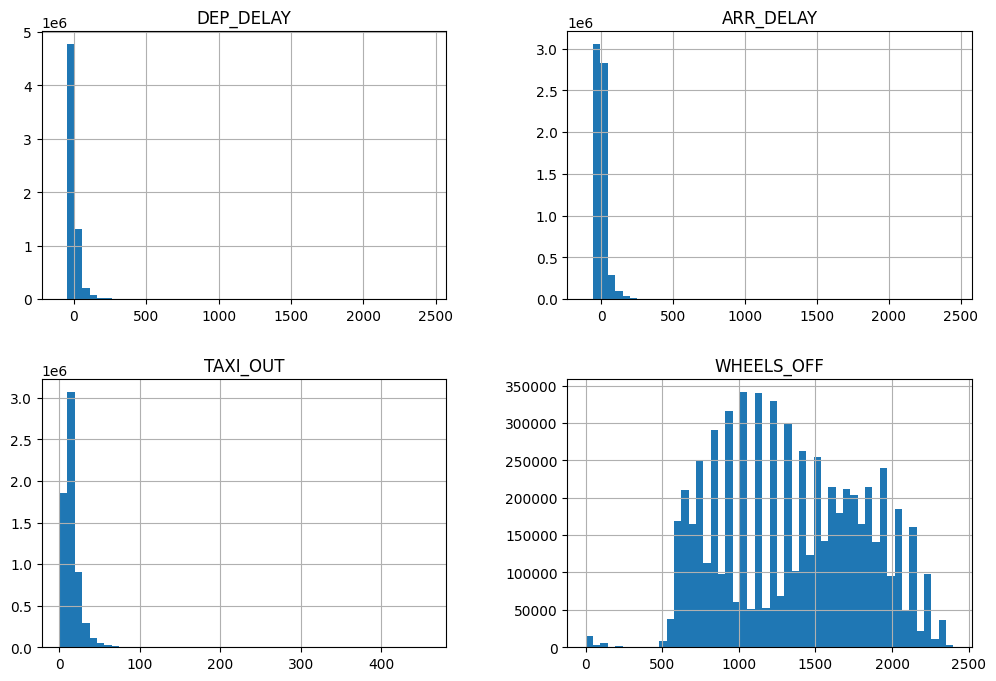

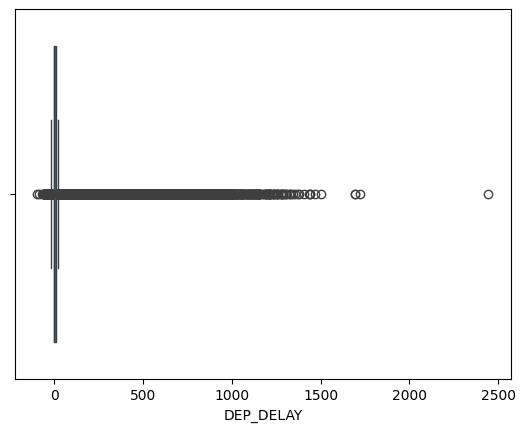

ValueError: could not convert string to float: 'XE'

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histogram for a few columns
df_cleaned[['DEP_DELAY', 'ARR_DELAY', 'TAXI_OUT', 'WHEELS_OFF']].hist(bins=50, figsize=(12, 8))
plt.show()

# Boxplots to check for outliers
sns.boxplot(x=df_cleaned['DEP_DELAY'])
plt.show()

# Correlation heatmap to see relationships between numerical variables
corr = df_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


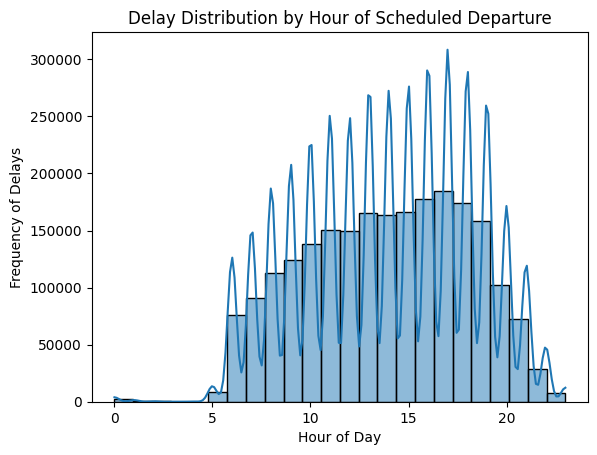

In [57]:

# Creating a column for hour of departure
df['CRS_DEP_HOUR'] = df['CRS_DEP_TIME'] // 100  # Assumes CRS_DEP_TIME is in HHMM format

# Plotting delay distribution by hour of scheduled departure
sns.histplot(df['CRS_DEP_HOUR'][df['DEP_DELAY'] > 0], bins=24, kde=True)
plt.title('Delay Distribution by Hour of Scheduled Departure')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency of Delays')
plt.show()


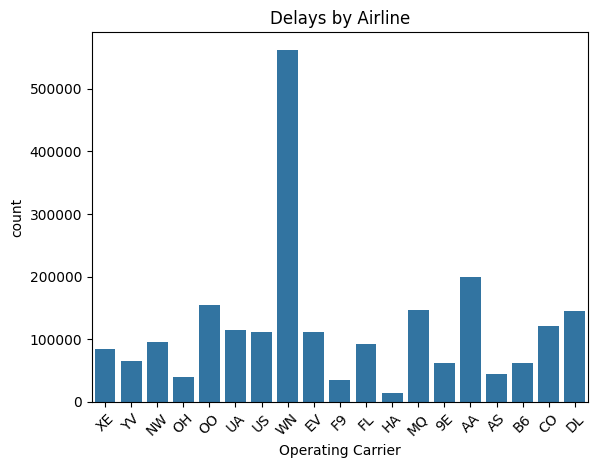

In [58]:
# Delays by Airline
sns.countplot(data=df[df['DEP_DELAY'] > 0], x='OP_CARRIER')
plt.title("Delays by Airline")
plt.xlabel("Operating Carrier")
plt.xticks(rotation=45)
plt.show()

In [59]:
# Define capping thresholds (example: 99th percentile for DEP_DELAY)
cap = df_cleaned['DEP_DELAY'].quantile(0.99)
df_cleaned['DEP_DELAY'] = df_cleaned['DEP_DELAY'].clip(upper=cap)


/tmp/ipykernel_422106/1544763523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DEP_DELAY'] = df_cleaned['DEP_DELAY'].clip(upper=cap)


In [60]:
# Percentage of cancelled and diverted flights
cancelled_percentage = df_cleaned['CANCELLED'].mean() * 100
diverted_percentage = df_cleaned['DIVERTED'].mean() * 100
print(f"Cancelled flights: {cancelled_percentage:.2f}%")
print(f"Diverted flights: {diverted_percentage:.2f}%")


Cancelled flights: 1.35%
Diverted flights: 0.24%


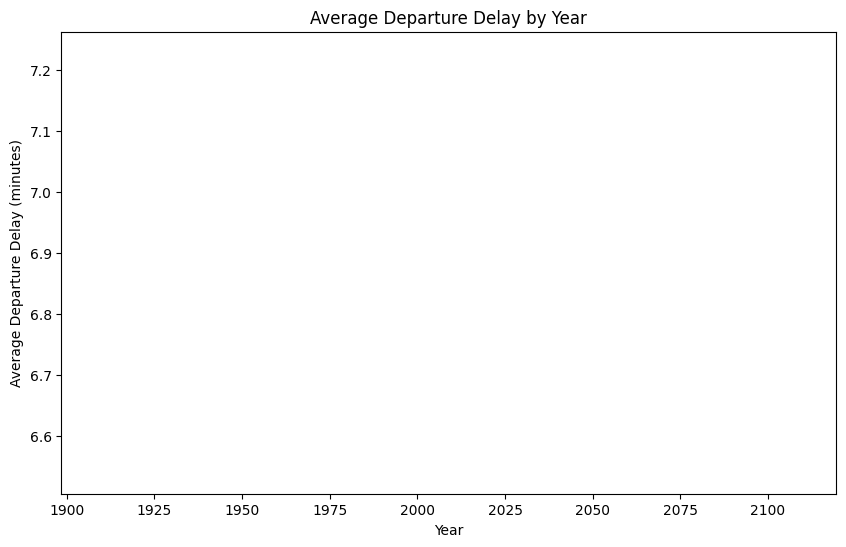

In [61]:
# Plot delays over time
df_cleaned.groupby('YEAR')['DEP_DELAY'].mean().plot(kind='line', figsize=(10, 6))
plt.title('Average Departure Delay by Year')
plt.xlabel('Year')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()


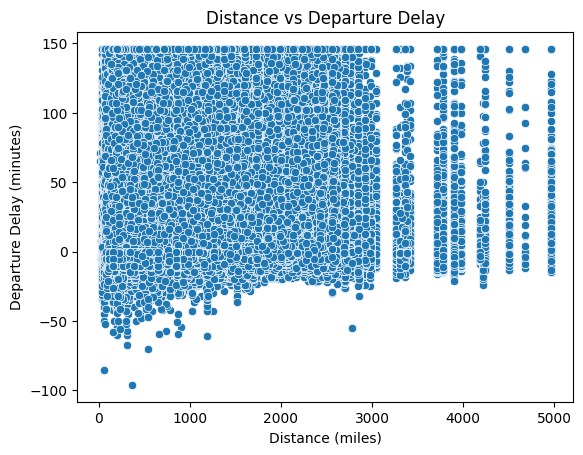

In [63]:
# Scatter plot of Distance vs. Departure Delay
sns.scatterplot(x=df_cleaned['DISTANCE'], y=df_cleaned['DEP_DELAY'])
plt.title('Distance vs Departure Delay')
plt.xlabel('Distance (miles)')
plt.ylabel('Departure Delay (minutes)')
plt.show()
